In [1]:
import pandas as pd
import numpy as np
import os
import random
import joblib
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,precision_recall_curve, average_precision_score
from lightgbm import LGBMClassifier

In [2]:
# Setting random seed to replicate results
DEFAULT_RANDOM_SEED = 2021

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

def seedEverything(seed=DEFAULT_RANDOM_SEED):
    seedBasic(seed)

seedEverything(2021)

In [3]:
# Load dataset
df = pd.read_csv('train.csv')  

# Convert labels
df['label'] = df['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
features_to_drop = [
    'bwd psh flags', 'bwd urg flags', 'fwd avg bytes/bulk',
    'fwd avg packets/bulk', 'fwd avg bulk rate', 'bwd avg bytes/bulk',
    'bwd avg packets/bulk', 'bwd avg bulk rate', 'fwd header length.1'
]


df = df.drop(columns=features_to_drop)

Dropping features which have only one value

In [6]:
# Split features and labels
X = df.drop(columns=['label'])
y = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.feature_selection import RFE
#Feature selection using RFE
model = LGBMClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14302
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14047
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13792
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13537
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13282
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13027
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13027
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12772
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12517
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12515
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12513
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12513
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12511
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12256
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12001
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11746
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11610
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11608
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11606
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11351
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11232
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11230
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10975
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10730
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10475
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10220
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9965
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9963
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9710
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9455
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9200
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8947
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8692
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8437
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8182
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7927
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7918
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7663
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7408
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7154
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6899
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6644
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6389
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6134
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5881
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5626
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5371
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5116
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5114
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4859
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4604
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4349
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4094
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3839
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3584
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3329
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 21256, number of negative: 93844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184674 -> initscore=-1.484995
[LightGBM] [Info] Start training from score -1.484995


RFE(estimator=LGBMClassifier(), n_features_to_select=10)

In [9]:
selected_features = X_train.columns[rfe.support_]

feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})
print(feature_ranking)

                        Feature  Ranking
0              destination port        1
1                 flow duration        1
2             total fwd packets       19
3        total backward packets       10
4   total length of fwd packets        1
..                          ...      ...
64                   active min       14
65                    idle mean       42
66                     idle std       48
67                     idle max       31
68                     idle min       12

[69 rows x 2 columns]


Finding best features using RFE

In [10]:
print("Top 10 features using RFE")
print(selected_features)

Top 10 features using RFE
Index(['destination port', 'flow duration', 'total length of fwd packets',
       'total length of bwd packets', 'bwd packet length mean', 'flow iat min',
       'fwd iat max', 'fwd iat min', 'init_win_bytes_forward',
       'init_win_bytes_backward'],
      dtype='object')


In [11]:
new_df = df[selected_features]
new_df['label'] = df['label']

C:\Users\akash\AppData\Local\Temp\ipykernel_20040\2569592695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label'] = df['label']


In [12]:
# Split features and labels
X = new_df.drop(columns=['label'])
y = new_df['label']

In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=DEFAULT_RANDOM_SEED)

In [14]:
# Standardize features

scaler = StandardScaler()

exclude_columns = ['label']

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [15]:
# Save scaler
joblib.dump(scaler, 'phase2scaler.pkl')

['phase2scaler.pkl']

In [16]:
def estimateResult(model,X,y,test_set,actual_vals,model_name):
    model.fit(X,y)
    result = model.predict(test_set)
    tn, fp, fn, tp = confusion_matrix(actual_vals, result).ravel()
    false_positive_rate = fp / (fp + tn)
    result_metrics = {
    "Model": model_name,
    "Accuracy": accuracy_score(actual_vals, result),
    "Precision": precision_score(actual_vals, result),
    "Recall": recall_score(actual_vals, result),
    "F1 Score": f1_score(actual_vals, result),
    "False Positive Rate": false_positive_rate}
    

    y_pred_prob = model.predict_proba(test_set)[:, 1]
    fpr, tpr, thresholds = roc_curve(actual_vals, y_pred_prob)
    auc_score = roc_auc_score(actual_vals, y_pred_prob)

    pyplot.figure(figsize=(8, 6))
    pyplot.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    pyplot.plot([0, 1], [0, 1], linestyle='--', color='gray')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title(f'ROC AUC Curve for {model_name}')
    pyplot.legend(loc='lower right')
    pyplot.show()

    precision, recall, _ = precision_recall_curve(actual_vals, y_pred_prob)
    avg_precision = average_precision_score(actual_vals, y_pred_prob)

    pyplot.figure(figsize=(8, 6))
    pyplot.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.title(f'Precision-Recall Curve for {model_name}')
    pyplot.legend(loc='lower left')
    pyplot.show()
    
    return result_metrics

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21176, number of negative: 93924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183979 -> initscore=-1.489617
[LightGBM] [Info] Start training from score -1.489617


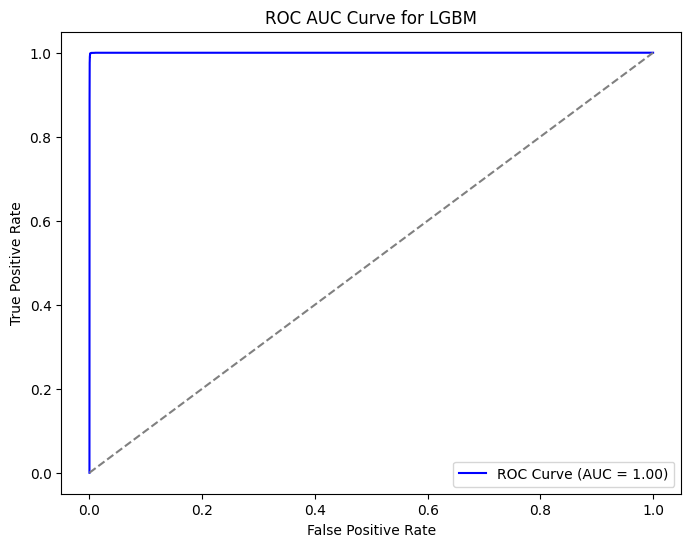

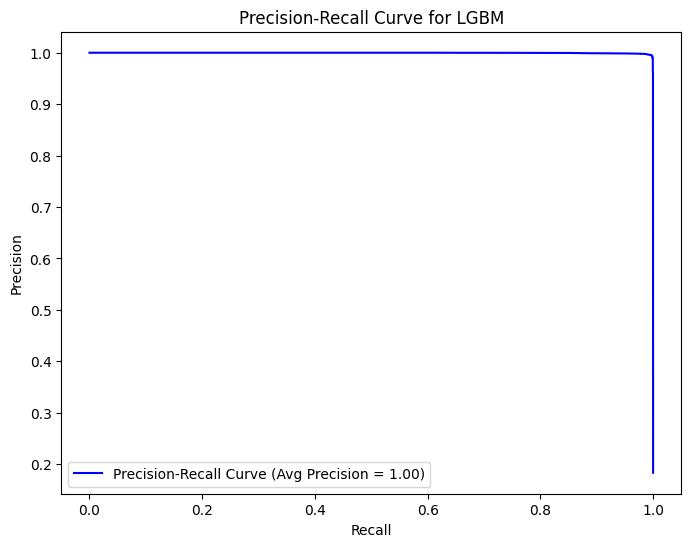

In [17]:
results = estimateResult(LGBMClassifier(), X_train, y_train, X_test, y_test,'LGBM')

In [18]:
non_para_result = pd.DataFrame([results])

non_para_result

,Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate
0,LGBM,0.998536,0.995293,0.996729,0.996011,0.001058


In [19]:
# Save results to CSV
non_para_result.to_csv('normal_model_results_phase2.csv', index=False)

In [20]:
grid_search = GridSearchCV(LGBMClassifier(), {'n_estimators': [50, 100]}, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21176, number of negative: 93924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183979 -> initscore=-1.489617
[LightGBM] [Info] Start training from score -1.489617


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100]}, scoring='f1')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21176, number of negative: 93924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 115100, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183979 -> initscore=-1.489617
[LightGBM] [Info] Start training from score -1.489617


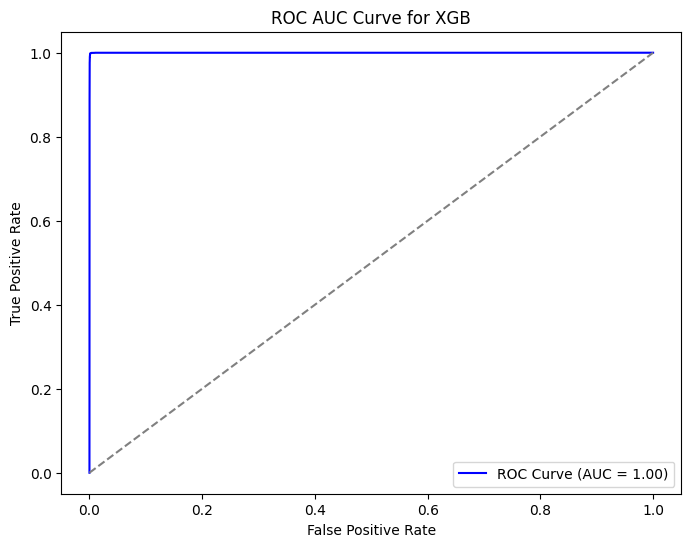

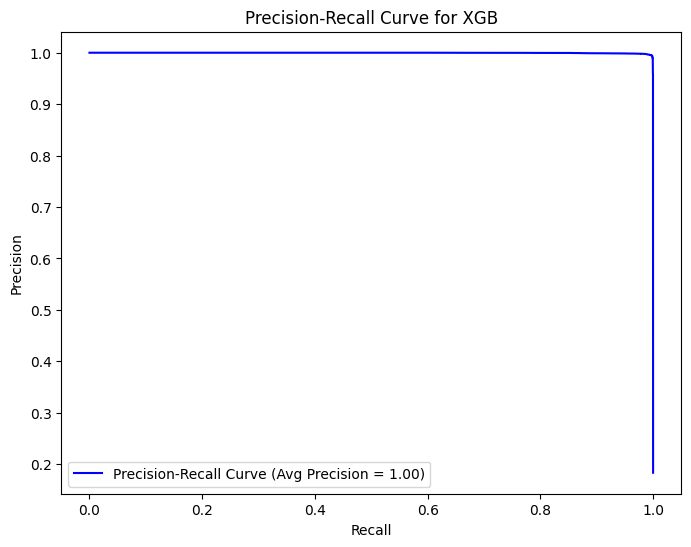

In [21]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
result = estimateResult(best_model, X_train, y_train, X_test, y_test,'XGB')

In [22]:
hyperparam_results_df = pd.DataFrame([result])

hyperparam_results_df

,Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate
0,XGB,0.998536,0.995293,0.996729,0.996011,0.001058


Output results look similar to non parameterized results

In [23]:
# Save results to CSV
hyperparam_results_df.to_csv('hyper_model_results_phase2.csv', index=False)

In [26]:
joblib.dump(best_model,'LGBM_phase2_model.pkl')

['LGBM_phase2_model.pkl']

In [27]:
display(best_params)

{'n_estimators': 100}